In [1]:
from sklearn.datasets import make_classification, make_circles, make_moons

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, SGDClassifier

from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd

from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [2]:
def plot_data(X, y):
    ax = plt.gca()
    ax.scatter(X[:,0], X[:,1], c=(y == 1), cmap=cm_bright)
    

In [3]:
def plot_surface(est, x_1, x_2, ax=None, threshold=0.5, contourf=False):
    xx1, xx2 = np.meshgrid(np.linspace(x_1.min(), x_1.max(), 100), 
                           np.linspace(x_2.min(), x_2.max(), 100))

    X_pred = np.c_[xx1.ravel(), xx2.ravel()]
    pred = est.predict_proba(X_pred)[:, 1]
    Z = pred.reshape((100, 100))
    if ax is None:
        ax = plt.gca()
    ax.contour(xx1, xx2, Z, levels=[threshold], colors='black')
    ax.set_xlim((x_1.min(), x_1.max()))
    ax.set_ylim((x_2.min(), x_2.max()))
    

In [4]:
def plot_surface_cust(est, x_1, x_2, ax=None, threshold=0.5, contourf=False):
    xx1, xx2 = np.meshgrid(np.linspace(x_1.min(), x_1.max(), 100), 
                           np.linspace(x_2.min(), x_2.max(), 100))

    X_pred = np.c_[xx1.ravel(), xx2.ravel(), np.square(xx1.ravel()), np.square(xx2.ravel()), np.multiply(xx1.ravel(), xx2.ravel())]
    pred = est.predict_proba(X_pred)[:, 1]
    Z = pred.reshape((100, 100))
    if ax is None:
        ax = plt.gca()
    ax.contour(xx1, xx2, Z, levels=[threshold], colors='black')
    ax.set_xlim((x_1.min(), x_1.max()))
    ax.set_ylim((x_2.min(), x_2.max()))

In [5]:
dataset = pd.read_csv('sats.csv')
X, y = dataset[['exam1', 'exam2']], dataset['submitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(80, 2) (20, 2)


In [6]:
cls = LogisticRegression()
cls = cls.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
y_train_pred = cls.predict(X_train)
accuracy_score(y_train_pred, y_train)

0.8625

In [8]:
y_test_pred = cls.predict(X_test)
accuracy_score(y_test_pred, y_test)

0.9

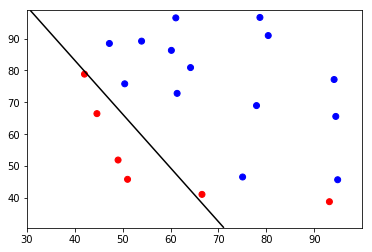

In [9]:
plot_data(X_test.values, y_test)
plot_surface(cls, X_train.values[:,0], X_train.values[:,1])
plt.show()

In [10]:
dataset = pd.read_csv('tests.csv')
X, y = dataset[['test1', 'test2']], dataset['passed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(94, 2) (24, 2)


In [11]:
cls = LogisticRegression()
cls = cls.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
y_train_pred = cls.predict(X_train)
accuracy_score(y_train_pred, y_train)

0.5851063829787234

In [13]:
y_test_pred = cls.predict(X_test)
accuracy_score(y_test_pred, y_test)

0.4583333333333333

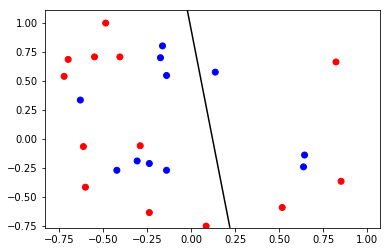

In [14]:
plot_data(X_test.values, y_test)
plot_surface(cls, X_train.values[:,0], X_train.values[:,1])
plt.show()

In [15]:
dataset = pd.read_csv('tests.csv')
X, y = dataset[['test1', 'test2']], dataset['passed']
X['test1test1'] = np.square(X['test1'])
X['test2test2'] = np.square(X['test2'])
X['test1test2'] = np.multiply(X['test1'], X['test2'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(94, 5) (24, 5)


In [16]:
cls = LogisticRegression()
cls = cls.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
y_train_pred = cls.predict(X_train)
accuracy_score(y_train_pred, y_train)

0.8085106382978723

In [18]:
y_test_pred = cls.predict(X_test)
accuracy_score(y_test_pred, y_test)

0.8333333333333334

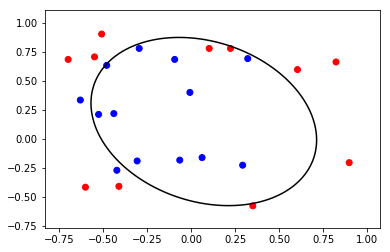

In [19]:
plot_data(X_test.values, y_test)
plot_surface_cust(cls, X_train.values[:,0], X_train.values[:,1])
plt.show()

In [20]:
#X, y = make_classification(n_samples=200, n_classes=2, n_features=2, n_informative=2, n_redundant=0)
#X, y = make_circles(n_samples=200)
X, y = make_moons(n_samples=200)

In [21]:
X[:5]

array([[ 1.04758192, -0.49886734],
       [ 0.19472974, -0.09290793],
       [ 0.36944733, -0.27614646],
       [ 0.44607994, -0.33256985],
       [ 0.23395556, -0.14278761]])

In [22]:
y[:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(160, 2) (40, 2)


In [24]:
cls = LogisticRegression()
cls = cls.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
y_train_pred = cls.predict(X_train)
accuracy_score(y_train_pred, y_train)

0.88125

In [26]:
y_test_pred = cls.predict(X_test)
accuracy_score(y_test_pred, y_test)

0.825

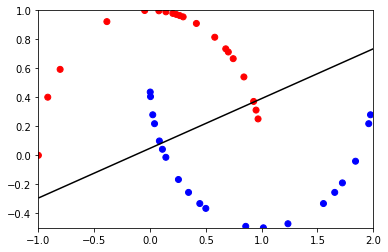

In [27]:
plot_data(X_test, y_test)
plot_surface(cls, X_train[:,0], X_train[:,1])
plt.show()